In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [12]:
data = pd.read_csv('netflix_titles.csv')

In [13]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [14]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
data.shape

(8807, 12)

In [16]:
data.dropna(inplace = True)

In [17]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [23]:
for i in data['rating']:
    if i in ['R', 'TV-MA']:
        data['rating'].replace(i, 'R', inplace = True)
    elif i in ['PG', 'TV-PG' , 'TV-14']:
        data['rating'].replace(i, 'PG', inplace = True)
    elif i in ['G', 'TV-Y', 'TV-G', 'TV-Y7']:
        data['rating'].replace(i, 'G', inplace = True)
    elif i in ['NR', 'UR']:
        data['rating'].replace(i, 'NR', inplace = True)

In [24]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,R,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,PG,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,R,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,PG,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


In [101]:
genres = {}
for g in data['listed_in']:
    for i in g.split(','):
        if i not in genres:
            genres[i]= 1
        else:
            genres[i] += 1
print(genres)

{'Dramas': 1518, ' Independent Movies': 720, ' International Movies': 2260, 'British TV Shows': 21, ' Reality TV': 2, 'Comedies': 1127, ' Dramas': 775, ' Romantic Movies': 576, 'Horror Movies': 261, ' Sci-Fi & Fantasy': 223, 'Thrillers': 62, 'Action & Adventure': 806, ' Classic Movies': 35, ' Horror Movies': 75, ' Thrillers': 485, ' Anime Features': 43, ' Comedies': 426, 'Sci-Fi & Fantasy': 13, 'Children & Family Movies': 469, 'Documentaries': 372, ' Music & Musicals': 277, ' Cult Movies': 57, 'Classic Movies': 73, ' Children & Family Movies': 34, ' Faith & Spirituality': 58, ' LGBTQ Movies': 79, 'Crime TV Shows': 32, ' International TV Shows': 42, ' TV Dramas': 51, 'International TV Shows': 45, ' Romantic TV Shows': 20, ' Spanish-Language TV Shows': 10, 'Stand-Up Comedy': 286, 'TV Shows': 5, 'Movies': 20, ' TV Comedies': 27, ' Sports Movies': 156, ' TV Action & Adventure': 11, ' TV Sci-Fi & Fantasy': 4, 'International Movies': 109, ' TV Mysteries': 8, ' Docuseries': 7, 'Reality TV': 1

In [81]:
data_n = data[(data.country == 'United States')]

In [82]:
data_n.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...
41,s42,Movie,Jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,"September 16, 2021",1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas",When an insatiable great white shark terrorize...
42,s43,Movie,Jaws 2,Jeannot Szwarc,"Roy Scheider, Lorraine Gary, Murray Hamilton, ...",United States,"September 16, 2021",1978,PG,116 min,"Dramas, Horror Movies, Thrillers",Four years after the last deadly shark attacks...


{'whiskers': [<matplotlib.lines.Line2D at 0x7f9683c4c460>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9683c4cb50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9683c4c100>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9683c5a250>],
 'fliers': [],
 'means': []}

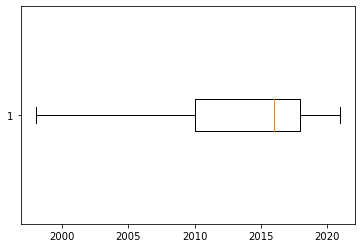

In [83]:
plt.boxplot(data_n.release_year, vert = False, showfliers=False)
#plt.boxplot(data_n.release_year, vert = False)

In [84]:
data_n2 = data_n[data_n.release_year > 1999]

In [85]:
data_n2.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...
48,s49,Movie,Training Day,Antoine Fuqua,"Denzel Washington, Ethan Hawke, Scott Glenn, T...",United States,"September 16, 2021",2001,R,122 min,"Dramas, Thrillers",A rookie cop with one day to prove himself to ...


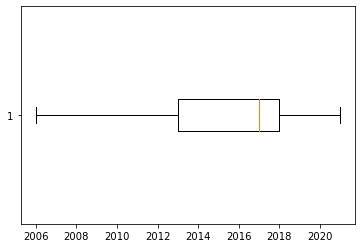

In [88]:
plt.boxplot(data_n2.release_year, vert=False, showfliers = False)
data_n2 = data_n2[data_n2.release_year > 2005]

In [89]:
data_n2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...
81,s82,Movie,Kate,Cedric Nicolas-Troyan,"Mary Elizabeth Winstead, Jun Kunimura, Woody H...",United States,"September 10, 2021",2021,R,106 min,Action & Adventure,"Slipped a fatal poison on her final job, a rut..."
96,s97,Movie,If I Leave Here Tomorrow: A Film About Lynyrd ...,Stephen Kijak,"Ronnie Van Zandt, Gary Rossington, Allen Colli...",United States,"September 7, 2021",2018,R,97 min,"Documentaries, Music & Musicals","Using interviews and archival footage, this do..."


In [90]:
data_n2.director.value_counts()

Marcus Raboy                 15
Jay Karas                    14
Jay Chapman                  12
Shannon Hartman               8
Ryan Polito                   8
                             ..
David Lowery                  1
Daryl Hannah                  1
Jim Strouse                   1
Grant Korgan, Brian Niles     1
Peter Sattler                 1
Name: director, Length: 1212, dtype: int64

In [91]:
cast = {}
for i in data_n2['cast']:
    for j in i.split(','):
        if j not in cast:
            cast[j] = 1
        else:
            cast[j] += 1
#print(cast)
print(max(cast.items(), key = lambda k : k[1])[0])


Adam Sandler


In [93]:
#director
d_data = data_n2[data_n2.director == 'Marcus Raboy']

In [111]:
data['date'] = pd.to_datetime(data['date_added'])

In [112]:
d_data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date
2507,s2508,TV Show,Patton Oswalt: I Love Everything,Marcus Raboy,"Patton Oswalt, Bob Rubin",United States,"May 19, 2020",2020,R,1 Season,"Stand-Up Comedy & Talk Shows, TV Comedies",Turning 50. Finding love again. Buying a house...,2020-05-19
2849,s2850,Movie,Taylor Tomlinson: Quarter-Life Crisis,Marcus Raboy,Taylor Tomlinson,United States,"March 3, 2020",2020,R,61 min,Stand-Up Comedy,She's halfway through her 20s — and she's over...,2020-03-03
3776,s3777,Movie,Miranda Sings Live…Your Welcome,Marcus Raboy,Colleen Ballinger,United States,"June 4, 2019",2019,PG,62 min,Stand-Up Comedy,Viral video star Miranda Sings and her real-wo...,2019-06-04


In [99]:
max(d_data['date'])
min(d_data['date'])

Timestamp('2016-11-04 00:00:00')

In [102]:
d_genres = {}
for g in d_data['listed_in']:
    for i in g.split(','):
        if i not in d_genres:
            d_genres[i]= 1
        else:
            d_genres[i] += 1
print(d_genres)

{'Stand-Up Comedy & Talk Shows': 1, ' TV Comedies': 1, 'Stand-Up Comedy': 14}


In [103]:
c_data = data_n2[data_n2['cast'].str.contains("Adam Sandler")]

In [104]:
c_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
1879,s1880,Movie,Hubie Halloween,Steve Brill,"Adam Sandler, Kevin James, Julie Bowen, Ray Li...",United States,"October 7, 2020",2020,PG-13,104 min,"Comedies, Horror Movies","Hubie's not the most popular guy in Salem, Mas..."
2471,s2472,Movie,Uncut Gems,"Josh Safdie, Benny Safdie","Adam Sandler, LaKeith Stanfield, Kevin Garnett...",United States,"May 25, 2020",2019,R,135 min,"Dramas, Thrillers",With his debts mounting and angry collectors c...
3753,s3754,Movie,Murder Mystery,Kyle Newacheck,"Adam Sandler, Jennifer Aniston, Luke Evans, Ge...",United States,"June 14, 2019",2019,PG-13,98 min,Comedies,"On a long-awaited trip to Europe, a New York C..."
4482,s4483,Movie,ADAM SANDLER 100% FRESH,Steve Brill,Adam Sandler,United States,"October 23, 2018",2018,R,74 min,Stand-Up Comedy,"From ""Heroes"" to ""Ice Cream Ladies"" – Adam San..."
4912,s4913,Movie,The Week Of,Robert Smigel,"Adam Sandler, Chris Rock, Steve Buscemi, Rache...",United States,"April 27, 2018",2018,PG,117 min,Comedies,Two fathers with clashing views about their ch...
5227,s5228,Movie,The Meyerowitz Stories (New and Selected),Noah Baumbach,"Adam Sandler, Ben Stiller, Dustin Hoffman, Eli...",United States,"October 13, 2017",2017,R,113 min,"Comedies, Dramas, Independent Movies",Grudges and rivalries abound as three adult si...
5533,s5534,Movie,Sandy Wexler,Steven Brill,"Adam Sandler, Jennifer Hudson, Kevin James, Te...",United States,"April 14, 2017",2017,PG,131 min,Comedies,When a hapless but dedicated talent manager si...
5846,s5847,Movie,The Do-Over,Steven Brill,"Adam Sandler, David Spade, Paula Patton, Kathr...",United States,"May 27, 2016",2016,R,109 min,"Action & Adventure, Comedies",The life of a bank manager is turned upside do...
5879,s5880,Movie,The Ridiculous 6,Frank Coraci,"Adam Sandler, Terry Crews, Jorge Garcia, Taylo...",United States,"December 11, 2015",2015,PG,120 min,"Action & Adventure, Comedies","When his outlaw dad is kidnapped, Tommy “White..."


In [105]:
c_genres = {}
for g in c_data['listed_in']:
    for i in g.split(','):
        if i not in c_genres:
            c_genres[i]= 1
        else:
            c_genres[i] += 1
print(c_genres)

{'Comedies': 7, ' Horror Movies': 1, 'Dramas': 1, ' Thrillers': 1, 'Stand-Up Comedy': 1, ' Dramas': 1, ' Independent Movies': 1, 'Action & Adventure': 3, ' Comedies': 5, 'Children & Family Movies': 2, ' Sci-Fi & Fantasy': 1}


In [106]:
max(c_genres.items(), key = lambda x:x[1])

('Comedies', 7)

In [107]:
data_n2

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...
81,s82,Movie,Kate,Cedric Nicolas-Troyan,"Mary Elizabeth Winstead, Jun Kunimura, Woody H...",United States,"September 10, 2021",2021,R,106 min,Action & Adventure,"Slipped a fatal poison on her final job, a rut..."
96,s97,Movie,If I Leave Here Tomorrow: A Film About Lynyrd ...,Stephen Kijak,"Ronnie Van Zandt, Gary Rossington, Allen Colli...",United States,"September 7, 2021",2018,R,97 min,"Documentaries, Music & Musicals","Using interviews and archival footage, this do..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8790,s8791,Movie,You Don't Mess with the Zohan,Dennis Dugan,"Adam Sandler, John Turturro, Emmanuelle Chriqu...",United States,"September 1, 2019",2008,NR,113 min,"Action & Adventure, Comedies",An Israeli counterterrorism soldier with a sec...
8791,s8792,Movie,Young Adult,Jason Reitman,"Charlize Theron, Patton Oswalt, Patrick Wilson...",United States,"November 20, 2019",2011,R,94 min,"Comedies, Dramas, Independent Movies",When a divorced writer gets a letter from an o...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


In [124]:
pg = data[(data.country == 'United States') & (data.release_year == 2021) & (data.rating == 'PG')]

In [125]:
pg

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date
231,s232,Movie,The Water Man,David Oyelowo,"David Oyelowo, Rosario Dawson, Lonnie Chavis, ...",United States,"August 25, 2021",2021,PG,92 min,"Children & Family Movies, Dramas","Desperate to save his ailing mother, 11-year-o...",2021-08-25
380,s381,TV Show,The Flash,Glen Winter,"Grant Gustin, Candice Patton, Danielle Panabak...",United States,"July 28, 2021",2021,PG,7 Seasons,"Crime TV Shows, TV Action & Adventure, TV Sci-...",A forensics expert who wakes from a coma with ...,2021-07-28
757,s758,Movie,Breaking Boundaries: The Science Of Our Planet,Jonathan Clay,"David Attenborough, Johan Rockström",United States,"June 4, 2021",2021,PG,74 min,Documentaries,David Attenborough and scientist Johan Rockstr...,2021-06-04
834,s835,Movie,Blue Miracle,Julio Quintana,"Jimmy Gonzales, Dennis Quaid, Anthony Gonzalez...",United States,"May 27, 2021",2021,PG,97 min,"Children & Family Movies, Dramas, Faith & Spir...","To save their cash-strapped orphanage, a guard...",2021-05-27
870,s871,Movie,Amy Tan: Unintended Memoir,James Redford,Amy Tan,United States,"May 18, 2021",2021,PG,101 min,Documentaries,From her painful past to her successful career...,2021-05-18
1150,s1151,Movie,7 Yards: The Chris Norton Story,Jonathon Link,Chris Norton,United States,"March 30, 2021",2021,PG,93 min,Documentaries,The true story of former college football play...,2021-03-30
1156,s1157,Movie,A Week Away,Roman White,"Kevin Quinn, Bailee Madison, Jahbril Cook, Kat...",United States,"March 26, 2021",2021,PG,98 min,"Children & Family Movies, Faith & Spirituality...","In this uplifting musical, a troubled teen tak...",2021-03-26
1218,s1219,Movie,YES DAY,Miguel Arteta,"Jennifer Garner, Edgar Ramírez, Jenna Ortega, ...",United States,"March 12, 2021",2021,PG,90 min,"Children & Family Movies, Comedies",A mom and dad who usually say no decide to say...,2021-03-12
1304,s1305,Movie,Animals on the Loose: A You vs. Wild Movie,Ben Simms,Bear Grylls,United States,"February 16, 2021",2021,PG,139 min,Children & Family Movies,"When wild animals escape from a sanctuary, Bea...",2021-02-16
1318,s1319,Movie,To All The Boys: Always And Forever,Michael Fimognari,"Lana Condor, Noah Centineo, Janel Parrish, Ann...",United States,"February 12, 2021",2021,PG,116 min,"Comedies, Romantic Movies",Senior year of high school takes center stage ...,2021-02-12


<AxesSubplot:>

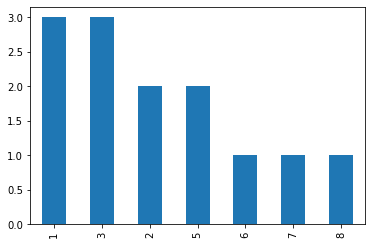

In [137]:
pg['date'].dt.month.value_counts().plot.bar()

In [138]:
rt  = data[data.type=='Movie']

In [139]:
rt.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,R,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021-09-24
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021-09-24
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,R,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021-09-23
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,PG,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021-09-21
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,2021-09-20


In [143]:
rt['min'] = [x.split()[0] for x in rt['duration']]

<ipython-input-143-29829d7f5eb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt['min'] = [x.split()[0] for x in rt['duration']]


In [145]:
rt

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date,min
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,R,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021-09-24,125
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021-09-24,104
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,R,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021-09-23,127
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,PG,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021-09-21,166
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,2021-09-20,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,R,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,2016-03-09,96
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019-11-20,158
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019-11-01,88
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020-01-11,88


In [180]:
rt = rt[rt.release_year > 2010 & rt.listed_in.str.contains('Dramas', 'Comedies')]

In [181]:
rt

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date,min
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021-09-24,104
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,R,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021-09-23,127
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...,2021-09-19,97
29,s30,Movie,Paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","United States, India, France","September 19, 2021",2013,PG-13,106 min,Thrillers,"Blackmailed by his company's CEO, a low-level ...",2021-09-19,106
38,s39,Movie,Birth of the Dragon,George Nolfi,"Billy Magnussen, Ron Yuan, Qu Jingjing, Terry ...","China, Canada, United States","September 16, 2021",2017,PG-13,96 min,"Action & Adventure, Dramas",A young Bruce Lee angers kung fu traditionalis...,2021-09-16,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8791,s8792,Movie,Young Adult,Jason Reitman,"Charlize Theron, Patton Oswalt, Patrick Wilson...",United States,"November 20, 2019",2011,R,94 min,"Comedies, Dramas, Independent Movies",When a divorced writer gets a letter from an o...,2019-11-20,94
8794,s8795,Movie,اشتباك,Mohamed Diab,"Nelly Karim, Hany Adel, Tarek Abdel Aziz, Ahme...","Egypt, France","October 11, 2018",2016,PG,98 min,"Dramas, Independent Movies, International Movies",Amid the tumult following Egyptian President M...,2018-10-11,98
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014,R,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...,2019-12-31,131
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,R,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,2016-03-09,96


In [182]:
means = {}
rt['min'] = rt['min'].astype(int)
for n,df in rt.groupby(['release_year']):
    if n not in means:
        means[n] = int(df['min'].mean())
means

{2011: 106,
 2012: 103,
 2013: 102,
 2014: 102,
 2015: 101,
 2016: 98,
 2017: 97,
 2018: 99,
 2019: 97,
 2020: 96,
 2021: 102}

<BarContainer object of 11 artists>

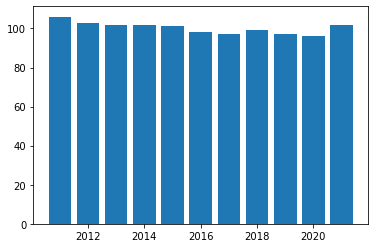

In [183]:
plt.bar(means.keys(), means.values())

In [177]:
z = data[data.description.str.contains('zombies')]

In [178]:
z.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date
1833,s1834,Movie,ParaNorman,"Sam Fell, Chris Butler","Kodi Smit-McPhee, Tucker Albrizzi, Anna Kendri...",United States,"October 18, 2020",2012,PG,93 min,"Children & Family Movies, Comedies","When an army of zombies invades a small town, ...",2020-10-18
7959,s7960,Movie,Scooby-Doo on Zombie Island,"Hiroshi Aoyama, Kazumi Fukushima, Jim Stenstrum","Scott Innes, Billy West, Mary Kay Bergman, Fra...",United States,"December 15, 2019",1998,PG,77 min,Children & Family Movies,When Daphne's TV show does a segment on real m...,2019-12-15
8290,s8291,Movie,The Evil Dead,Sam Raimi,"Bruce Campbell, Ellen Sandweiss, Richard DeMan...",United States,"January 10, 2020",1981,R,85 min,"Classic Movies, Cult Movies, Horror Movies",During a stop at a remote cabin deep within th...,2020-01-10
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019-11-01


In [184]:
z_genres = {}
for g in z['listed_in']:
    for i in g.split(','):
        if i not in z_genres:
            z_genres[i]= 1
        else:
            z_genres[i] += 1
print(z_genres)

{'Children & Family Movies': 2, ' Comedies': 1, 'Classic Movies': 1, ' Cult Movies': 1, ' Horror Movies': 2, 'Comedies': 1}


<BarContainer object of 6 artists>

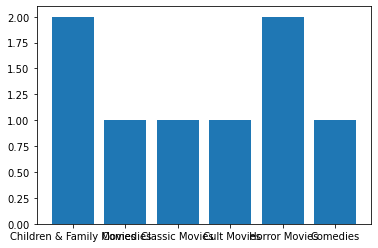

In [190]:
plt.bar(z_genres.keys(), z_genres.values())